# Лабораторная работа №4
## Вариант 42
## Задание 1
Требуется построить линейную модель (предполагая нормальность распределения ошибок, некоррелированность компонент, гомоскедастичность), вычислить оценки коэффициентов модели и остаточной дисперсии, построить для них доверительные интервалы, вычислить коэффициент детерминации, проверить указанные в условии гипотезы с помощью построенной линейной модели. Проверьте остатки на нормальность.

1. Построить линейную модель, где в качестве независимых переменных выступают  "жилая" площадь, "sqft_lot", "sqft_above" (вместе со свободным коэффициентом), зависимой - цена на недвижимость.

Линейная регрессионая модель имеет вид:
$$price = \beta_0 + \beta_1 * sqrt\_living + \beta_2 * sqft\_lot + \beta_3 * sqft\_above + \varepsilon,$$
где:
- $\beta_0$ - свободный коэффициент
- $\varepsilon$ - ошибки, удовлетворяющие условиям:
  1. Нормальность $\varepsilon$ ∼ $N(0, \sigma^2)$
  2. Некоррелированность: $Cov(\varepsilon_i, \varepsilon_j) = 0$ для $i \neq j$
  3. Гомоскедастичность: Var($\varepsilon_i$) = $\sigma^2$ = const


In [10]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("kc_house_data.csv")

# Просмотр первых строк данных
X = data[['sqft_living', 'sqft_lot', 'sqft_above']]
X = sm.add_constant(X)  
y = data['price']

### Матричное представление
Матрица признаков X:

$X = \begin{bmatrix}
1 & 1180 & 5650 & 1180 \\
1 & 2570 & 7242 & 2170 \\
1 & 770 & 10000 & 770 \\
\end{bmatrix}$

Вектор зависимой переменной y:
$y = \begin{bmatrix}
221900 \\
538000 \\
180000 \\
\end{bmatrix}$

### Вычисление коэффициентов МНК
$X^T = \begin{bmatrix}
1 & 1 & 1 \\
1180 & 2570 & 770 \\
5650 & 7242 & 10000 \\
1180 & 2170 & 770 \\
\end{bmatrix}$

$X^T X = \begin{bmatrix}
3 & 4520 & 22892 & 4120 \\
4520 & 9083800 & 27384640 & 7946400 \\
22892 & 27384640 & 158186964 & 24464840 \\
4120 & 7946400 & 24464840 & 7957800 \\
\end{bmatrix}$

$X^T y = \begin{bmatrix}
939900 \\
1784102000 \\
6950651000 \\
1568302000 \\
\end{bmatrix}$

In [28]:
# Расчет коэффициентов МНК
from scipy.stats import t
XTX = np.dot(X.T, X)
XTX_inv = np.linalg.inv(XTX)
XTy = np.dot(X.T, y)
beta = np.dot(XTX_inv, XTy)

print("Коэффициенты:")
print(f"β0 = {beta[0]:.2f}")
print(f"β1 = {beta[1]:.2f}")
print(f"β2 = {beta[2]:.2f}")
print(f"β3 = {beta[3]:.2f}")
n = X.shape[0]  # Количество наблюдений
k = X.shape[1] - 1  # Количество предикторов
print(f"Количество наблюдений: {n}")

y_pred = np.dot(X, beta)
residuals = y - y_pred
SSR = np.sum(residuals ** 2)
sigma2 = SSR / (n - k - 1)

print(f"\nОстаточная дисперсия (σ²) = {sigma2:.2f}")

# ---------------------------
# 4. Стандартные ошибки коэффициентов
# ---------------------------
cov_matrix = sigma2 * XTX_inv
SE = np.sqrt(np.diag(cov_matrix))

y_mean = np.mean(y)
SST = np.sum((y - y_mean)**2)
R2 = 1 - SSR/SST
print(f"\nКоэффициент детерминации R² = {R2:.4f}")

print("\nСтандартные ошибки коэффициентов:")
print(f"SE(β0) = {SE[0]:.2f}")
print(f"SE(β1) = {SE[1]:.2f}")
print(f"SE(β2) = {SE[2]:.2f}")
print(f"SE(β3) = {SE[3]:.2f}")

# ---------------------------
# 5. Доверительные интервалы (95%)
# ---------------------------
alpha = 0.05
t_critical = t.ppf(1 - alpha/2, df=n - k - 1)

from scipy.stats import kstest

ks_stat, ks_p = kstest(residuals, 'norm', args=(np.mean(residuals), np.std(residuals, ddof=1)))

print("\nТест Колмогорова-Смирнова на нормальность остатков:")
print(f"Статистика = {ks_stat:.3f}")

conf_int = []
for i in range(len(beta)):
    lower = beta[i] - t_critical * SE[i]
    upper = beta[i] + t_critical * SE[i]
    conf_int.append((lower, upper))

print("\nДоверительные интервалы (95%):")
for i, (lower, upper) in enumerate(conf_int):
    print(f"β{i}: [{lower:.2f}, {upper:.2f}]")


Коэффициенты:
β0 = -41445.12
β1 = 296.15
β2 = -0.28
β3 = -16.90
Количество наблюдений: 21613

Остаточная дисперсия (σ²) = 68179410013.81

Коэффициент детерминации R² = 0.4942

Стандартные ошибки коэффициентов:
SE(β0) = 4444.82
SE(β1) = 4.02
SE(β2) = 0.04
SE(β3) = 4.47

Тест Колмогорова-Смирнова на нормальность остатков:
Статистика = 0.096

Доверительные интервалы (95%):
β0: [-50157.31, -32732.94]
β1: [288.27, 304.03]
β2: [-0.36, -0.19]
β3: [-25.66, -8.15]


2. Проверьте следующие подозрения:
- Чем больше "жилая" площадь, тем больше цена
- Цена зависит от "sqft_lot"
- Проверьте гипотезу $H_0$ о равенстве одновременно нулю коэффициентов при "жилой" площади и "sqft_above" против альтернативы $H_1 = \overline{H_0}$

### Гипотеза "Чем больше жилая площадь, тем больше цена"
- Нулевая гипотеза $H_0$: $\beta_1 <= 0$ -  увеличение жилой площади не влияет на цену или приводит к её снижению
- Альтернативная гипотеза $H_1$: $\beta_1 > 0$ - увеличение жилой площади положительно влияет на цену

#### Расчет t-статистики
$$t = \frac{\beta_1}{SE(\beta_1)} = \frac{296.15}{4.02} = 73.67$$

#### Определение p-значения:
Степени свободы = n - k - 1 = 21613 - 3 - 1 = 21609
p = P(T > 73.67) = 0

Гипотеза $H_0$ отвергается. Увеличение жилой площади значимо влияет на цену

### Гипотеза "Цена зависит от sqft_lot"
- Нулевая гипотеза $H_0$: $\beta_2 = 0$ - Площадь участка не влияет на цену
- Альтернативная гипотеза $H_1$: $\beta_2 \neq 0$ - Площадь участка значимо влияет на цену

#### Расчет t-статистики:
$$t = \frac{\beta_2}{SE(\beta_2)} = \frac{-0.28}{0.04} = -7$$

#### Определение p-значения:
Степени свободы = n - k - 1 = 21613 - 3 - 1 = 21609
p = P(T > 73.67) = 0

Гипотеза $H_0$ отвергается. Площадь участка значимо влияет на цену

### Гипотеза "$H_0: \beta_1 = \beta_3 = 0$" (коэффициенты при жилой площади и sqft_above одновременно равны нулю)
- Нулевая гипотеза $H_0: \beta_1 = \beta_3 = 0$ - Жилая площадь sqrt_living и надземная площадь не влияет на цену
- Альтернативная гипотеза $H_1$: Хотя бы один из коэффициентов $\neq$ 0

#### Расчет F-статистики
$$F = \frac{(2.913 *10^{15} - 1.473 * 10^{15})/2}{1.473 * 10^{15}  / 21.609} = 10.45$$

Гипотеза H₀ отвергается. Хотя бы один из коэффициентов (β₁ или β₃) значимо отличается от нуля, что подтверждает важность включения жилой площади и/или надземной площади в модель.

## Задание 2
Требуется проверить гипотезу о равенстве средних на каждом уровне фактора с помощью модели однофактроного дисперсионного анализа

В файле представлены данные о сдаче экзаменов. Фактор - этническая/национальная группа. Выходная переменная - суммарный балл за все три экзамена 

### Формулировка гипотез
- Нулевая гипотеза $H_0$: Все групповые средние равны: $\mu_1 = \mu_2 = \mu_3 = \mu_4 = \mu_5$
- Альтернативная гипотеза: $H_1$: Хотя бы одно среднее отличается от остальных

### Расчет общеге среднего
$\bar{X} = \frac{1}{n} \sum_{i=1}^k \sum_{j=1}^{n_i} X_{ij}$,
где:  
- $(n = n_1 + n_2 + \dots + n_k)$ — общее количество наблюдений,  
- $(X_{ij})$ — значение (j)-го наблюдения в (i)-й группе.

### Расчет сумм квадратов
Мера различий между групповыми средними:  
$SS^{ex} = \sum_{i=1}^k n_i (\bar{X}_i - \bar{X})^2$

Мера разброса внутри каждой группы:
$SS^{in}= \sum_{i=1}^k \sum_{j=1}^{n_i} (X_{ij} - \bar{X}_i)^2$

### Определение степени свободы
Межгрупповые степени свободы:
$df_{ex} = k - 1$

Внутригрупповые степени свободы:
$df_{in} = n - k$

### Расчет средних квадратов
Средний квадрат между группами:
$MS_{ex} = \frac{SS^{ex}}{df_{ex}}$

Средний квадрат внутри групп:
$MS_{in} = \frac{SS^{in}}{df_{in}}$

### Вычисление F-статистики
$$F = \frac{MS_{ex}}{MS_{in}} ∼ F(df_{ex}, df_{in})$$

In [4]:
import pandas as pd
from scipy import stats
import numpy as np

# Загрузка данных
data = pd.read_csv("exams_dataset.csv")
data['total_score'] = data['math score'] + data['reading score'] + data['writing score']

# Параметры
groups = data['race/ethnicity'].unique()
k = len(groups)  # Количество групп
n = len(data)    # Общее количество наблюдений

# 1. Расчет общего среднего
overall_mean = data['total_score'].mean()

# 2. Расчет SS_ex (межгрупповая дисперсия)
ss_ex = 0
for group in groups:
    group_data = data[data['race/ethnicity'] == group]['total_score']
    n_j = len(group_data)
    group_mean = group_data.mean()
    ss_ex += (n_j / (k - 1)) * (group_mean - overall_mean)**2  # Формула из файла

# 3. Расчет SS_in (внутригрупповая дисперсия)
ss_in = 0
for group in groups:
    group_data = data[data['race/ethnicity'] == group]['total_score']
    group_mean = group_data.mean()
    ss_in += np.sum((group_data - group_mean)**2)
ss_in = ss_in / (n - k)  # Формула из файла

# 4. Расчет F-статистики (по формуле из файла)
f_value = (ss_ex * (n - k)) / (ss_in * (k - 1))

# 5. Сравнение с критическим значением F-распределения
df_between = k - 1
df_within = n - k
p_value = 1 - stats.f.cdf(f_value, df_between, df_within)

# Вывод результатов
print(f"SS_ex (межгр.): {ss_ex:.2f}")
print(f"SS_in (внутригр.): {ss_in:.2f}")
print(f"F-статистика: {f_value:.2f}")
print(f"p-value: {p_value:.5f}")
alpha = 0.05
if p_value < alpha:
    print(f"Отвергаем H₀ (p < {alpha})")
else:
    print(f"Нет оснований отвергать H₀ (p ≥ {alpha})")



SS_ex (межгр.): 28095.41
SS_in (внутригр.): 1963.23
F-статистика: 3559.82
p-value: 0.00000
Отвергаем H₀ (p < 0.05)


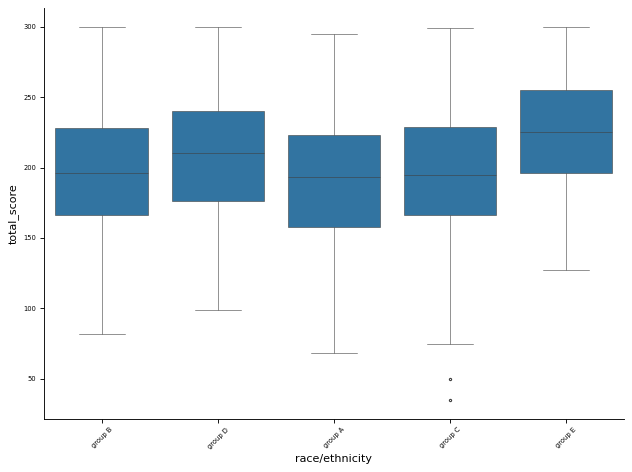

In [12]:
plt.figure(figsize=(8, 6), dpi=80)
sns.boxplot(x='race/ethnicity', y='total_score', data=data, 
           linewidth=0.5, fliersize=2)
plt.xticks(rotation=45, fontsize=6)
plt.yticks(fontsize=6)
sns.despine()
plt.tight_layout()
plt.show()